In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
weather = pd.read_csv('weatherAUS.csv')

In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
weather.dropna(subset=['RainToday'] , inplace = True)

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142199 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142199 non-null  object 
 1   Location       142199 non-null  object 
 2   MinTemp        141712 non-null  float64
 3   MaxTemp        141729 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    81711 non-null   float64
 6   Sunshine       74379 non-null   float64
 7   WindGustDir    132474 non-null  object 
 8   WindGustSpeed  132534 non-null  float64
 9   WindDir9am     132410 non-null  object 
 10  WindDir3pm     138400 non-null  object 
 11  WindSpeed9am   141108 non-null  float64
 12  WindSpeed3pm   139552 non-null  float64
 13  Humidity9am    140645 non-null  float64
 14  Humidity3pm    138569 non-null  float64
 15  Pressure9am    128259 non-null  float64
 16  Pressure3pm    128206 non-null  float64
 17  Cloud9am       88868 non-null   fl

In [6]:
year = pd.to_datetime(weather.Date).dt.year
train_df = weather[year < 2015]
val_df = weather[year == 2015]
test_df = weather[year > 2015]

In [7]:
print("Train_df shape : ", train_df.shape)
print("val_df shape:" , val_df.shape)
print("test_df shape : ", test_df.shape)

Train_df shape :  (98987, 23)
val_df shape: (17232, 23)
test_df shape :  (25980, 23)


In [8]:
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [9]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [10]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [11]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [12]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy = 'mean').fit(weather[numeric_cols])

In [15]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [16]:
print(test_inputs[numeric_cols].isna().sum().sum()+
val_inputs[numeric_cols].isna().sum().sum()+
train_inputs[numeric_cols].isna().sum().sum())
train_inputs.info()
test_inputs.info()
val_inputs.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 98987 entries, 0 to 144552
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       98987 non-null  object 
 1   MinTemp        98987 non-null  float64
 2   MaxTemp        98987 non-null  float64
 3   Rainfall       98987 non-null  float64
 4   Evaporation    98987 non-null  float64
 5   Sunshine       98987 non-null  float64
 6   WindGustDir    91730 non-null  object 
 7   WindGustSpeed  98987 non-null  float64
 8   WindDir9am     91866 non-null  object 
 9   WindDir3pm     96940 non-null  object 
 10  WindSpeed9am   98987 non-null  float64
 11  WindSpeed3pm   98987 non-null  float64
 12  Humidity9am    98987 non-null  float64
 13  Humidity3pm    98987 non-null  float64
 14  Pressure9am    98987 non-null  float64
 15  Pressure3pm    98987 non-null  float64
 16  Cloud9am       98987 non-null  float64
 17  Cloud3pm       98987 non-null  float64
 18  Temp9am 

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler().fit(weather[numeric_cols])

In [19]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [20]:
from sklearn.preprocessing import OneHotEncoder
train_df[categorical_cols].fillna('Unknown')
test_df[categorical_cols].fillna('Unknown')
val_df[categorical_cols].fillna('Unknown')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
2133,Albury,WSW,ESE,W,No
2134,Albury,NE,ESE,ESE,No
2135,Albury,NNE,NE,N,No
2136,Albury,NNE,ESE,W,No
2137,Albury,E,SSE,SE,No
...,...,...,...,...,...
144913,Uluru,E,ESE,E,No
144914,Uluru,ESE,E,ESE,No
144915,Uluru,E,E,SE,No
144916,Uluru,E,E,SSE,No


In [21]:
encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore',
).fit(weather[categorical_cols])

In [22]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [23]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17776\1590205797.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17776\1590205797.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17776\1590205797.py:1: PerformanceWarning: DataFrame is highly frag

In [24]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17776\2279925850.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17776\2279925850.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17776\2279925850.py:1: PerformanceWarning: DataFrame is highly fragmented. 

In [25]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier(random_state = 42)
# Check the mode of train_targets
mode_value = train_targets.mode()[0]
print(f"Mode of train_targets: {mode_value}")

# Fill missing values in train_targets with the mode
train_targets.fillna(mode_value, inplace=True)

# Verify if there are still any NaN values
print(train_targets.isna().sum())

Mode of train_targets: No
0


In [28]:
%%time
model.fit(X_train , train_targets)

CPU times: total: 5.61 s
Wall time: 5.85 s


DecisionTreeClassifier(random_state=42)

In [29]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [30]:
pred_model = model.predict(X_train)

In [31]:
pred_model

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(98987,), dtype=object)

In [32]:
pd.value_counts(pred_model)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17776\748369298.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pred_model)


No     77191
Yes    21796
Name: count, dtype: int64

In [33]:
train_probs = model.predict_proba(X_train)

In [34]:
prob_train = pd.DataFrame(train_probs)
print(prob_train)

         0    1
0      1.0  0.0
1      1.0  0.0
2      1.0  0.0
3      1.0  0.0
4      1.0  0.0
...    ...  ...
98982  1.0  0.0
98983  1.0  0.0
98984  1.0  0.0
98985  1.0  0.0
98986  1.0  0.0

[98987 rows x 2 columns]


In [35]:
accuracy_score(pred_model , train_targets)

0.999979795326659

In [36]:
print(val_targets.unique())
val_targets = val_targets.fillna('Unknown')  # Replace NaN with 'Unknown' or remove rows

['No' 'Yes' nan]


In [37]:
model.score(X_val , val_targets)

0.7898096564531105

In [38]:
val_targets.value_counts() / len(val_targets)

RainTomorrow
No         0.784065
Yes        0.207637
Unknown    0.008299
Name: count, dtype: float64

In [39]:
from sklearn.tree import plot_tree, export_text

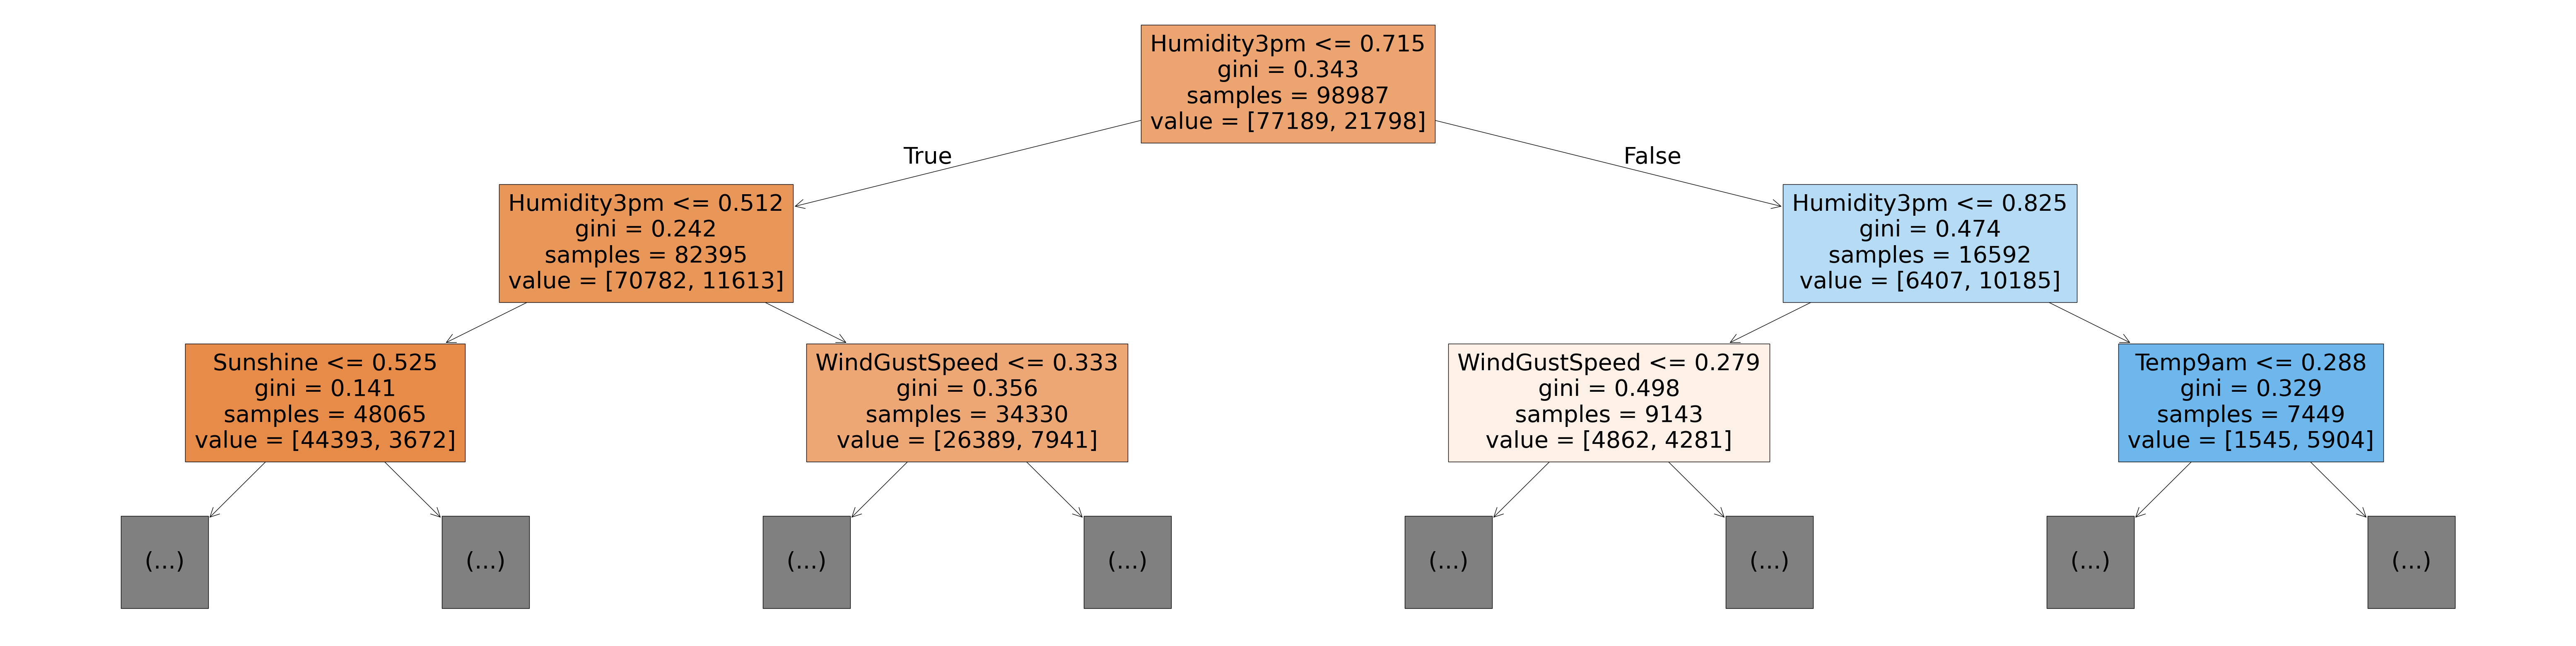

In [40]:
plt.figure(figsize = (80,20))
plot_tree(model , feature_names = X_train.columns , max_depth = 2 , filled=True);

In [41]:
model.tree_.max_depth

47

In [42]:
tree_text = export_text(model , max_depth = 10 , feature_names = list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.32
|   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.06
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.06
|   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.65
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Temp9am >  0.65
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.32
|   |   |   |   |   |   |   | 

In [43]:
(X_train.columns)
model.feature_importances_

array([3.93254793e-02, 3.10399660e-02, 4.18668382e-02, 2.27500351e-02,
       4.45577405e-02, 6.49385970e-02, 2.94801098e-02, 3.05831214e-02,
       3.75601084e-02, 2.74794318e-01, 3.36280265e-02, 6.41134463e-02,
       1.37750794e-02, 1.90672199e-02, 3.61328128e-02, 3.21818541e-02,
       1.74455402e-03, 2.25199775e-03, 1.35572436e-03, 6.26775526e-04,
       1.64838537e-03, 7.95936493e-04, 1.04148619e-03, 2.18513461e-03,
       8.87850464e-04, 1.37112459e-03, 1.14081676e-03, 2.15036614e-03,
       1.51826161e-03, 5.65945130e-04, 5.29581955e-04, 1.68891456e-03,
       7.58008405e-05, 1.35677160e-03, 1.29199561e-03, 1.54266246e-03,
       1.07099683e-03, 8.58162835e-04, 1.16012100e-03, 1.81272498e-03,
       3.96165034e-04, 5.09226103e-04, 1.42925761e-03, 1.38617946e-03,
       1.10659388e-03, 9.49935593e-04, 6.79803429e-04, 1.21934411e-03,
       1.43398326e-03, 2.31595059e-03, 7.68652201e-04, 1.71183557e-03,
       1.10856555e-03, 2.21654705e-03, 1.17857127e-03, 5.59090858e-04,
      

In [44]:
importance_df = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' : model.feature_importances_
}).sort_values('importance' , ascending = False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.274794
5,WindGustSpeed,0.064939
11,Pressure3pm,0.064113
4,Sunshine,0.044558
2,Rainfall,0.041867
0,MinTemp,0.039325
8,Humidity9am,0.037560
14,Temp9am,0.036133
10,Pressure9am,0.033628
15,Temp3pm,0.032182


<Axes: title={'center': 'Feature Importances'}, xlabel='importance', ylabel='feature'>

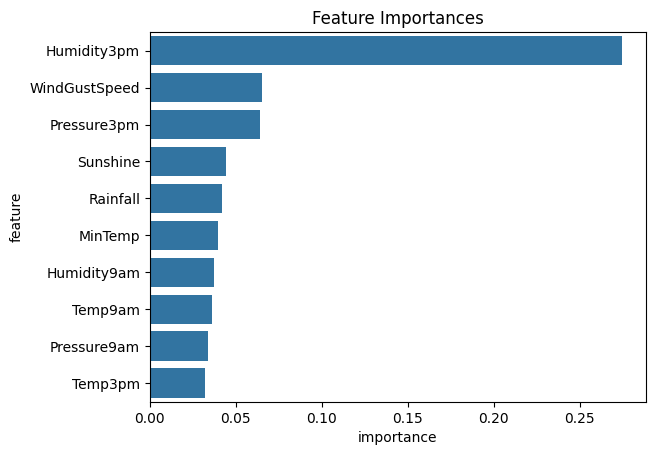

In [45]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

plt.title('Feature Importances')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')


In [46]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [47]:
%%time
errors_df = pd.DataFrame(max_depth_error(i) for i in range(1,25))

CPU times: total: 1min 16s
Wall time: 1min 19s


In [48]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.182044,0.183322
1,2,0.176175,0.177577
2,3,0.167881,0.171831
3,4,0.161456,0.167073
4,5,0.156768,0.165622
5,6,0.153879,0.163301
6,7,0.150111,0.162953
7,8,0.145635,0.162430
8,9,0.140251,0.163011
9,10,0.133179,0.165738


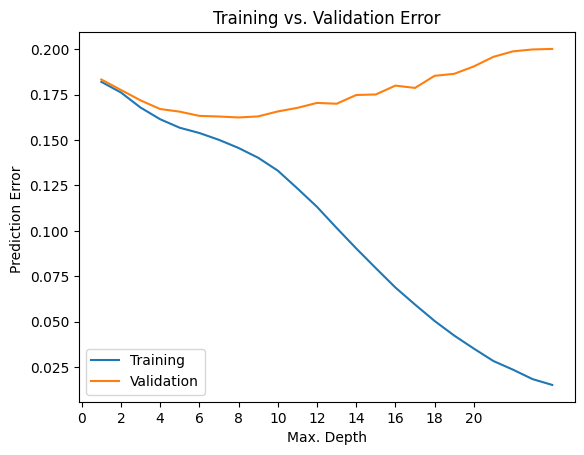

In [49]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error ')
plt.legend(['Training', 'Validation'])

In [50]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8370473537604457

In [51]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [52]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 2.36 s
Wall time: 2.56 s


DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [53]:
model.score(X_train, train_targets)

0.8515158556174043

In [54]:
model.score(X_val, val_targets)

0.8369312906220984

In [55]:
model.tree_.max_depth

11

In [56]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.37
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Cloud3pm <= 0.39
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- Cloud3pm >  0.39
|   |   |   |   |   |   |   |--- Location_Hobart <= 0.50
|   |   |   |   |   |   |   |   |--- WindGustSpeed <= 0.23
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- WindGustSpeed >  0.23

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model = RandomForestClassifier(n_jobs = -1 , random_state = 42)

In [59]:
%%time
model.fit(X_train , train_targets)

CPU times: total: 58 s
Wall time: 9.43 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [60]:
model.score(X_train , train_targets)

0.9999696929899886

In [61]:
model.score(X_val , val_targets)

0.849233983286908

In [62]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.95, 0.05],
       [0.99, 0.01],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.89, 0.11]], shape=(98987, 2))

In [63]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

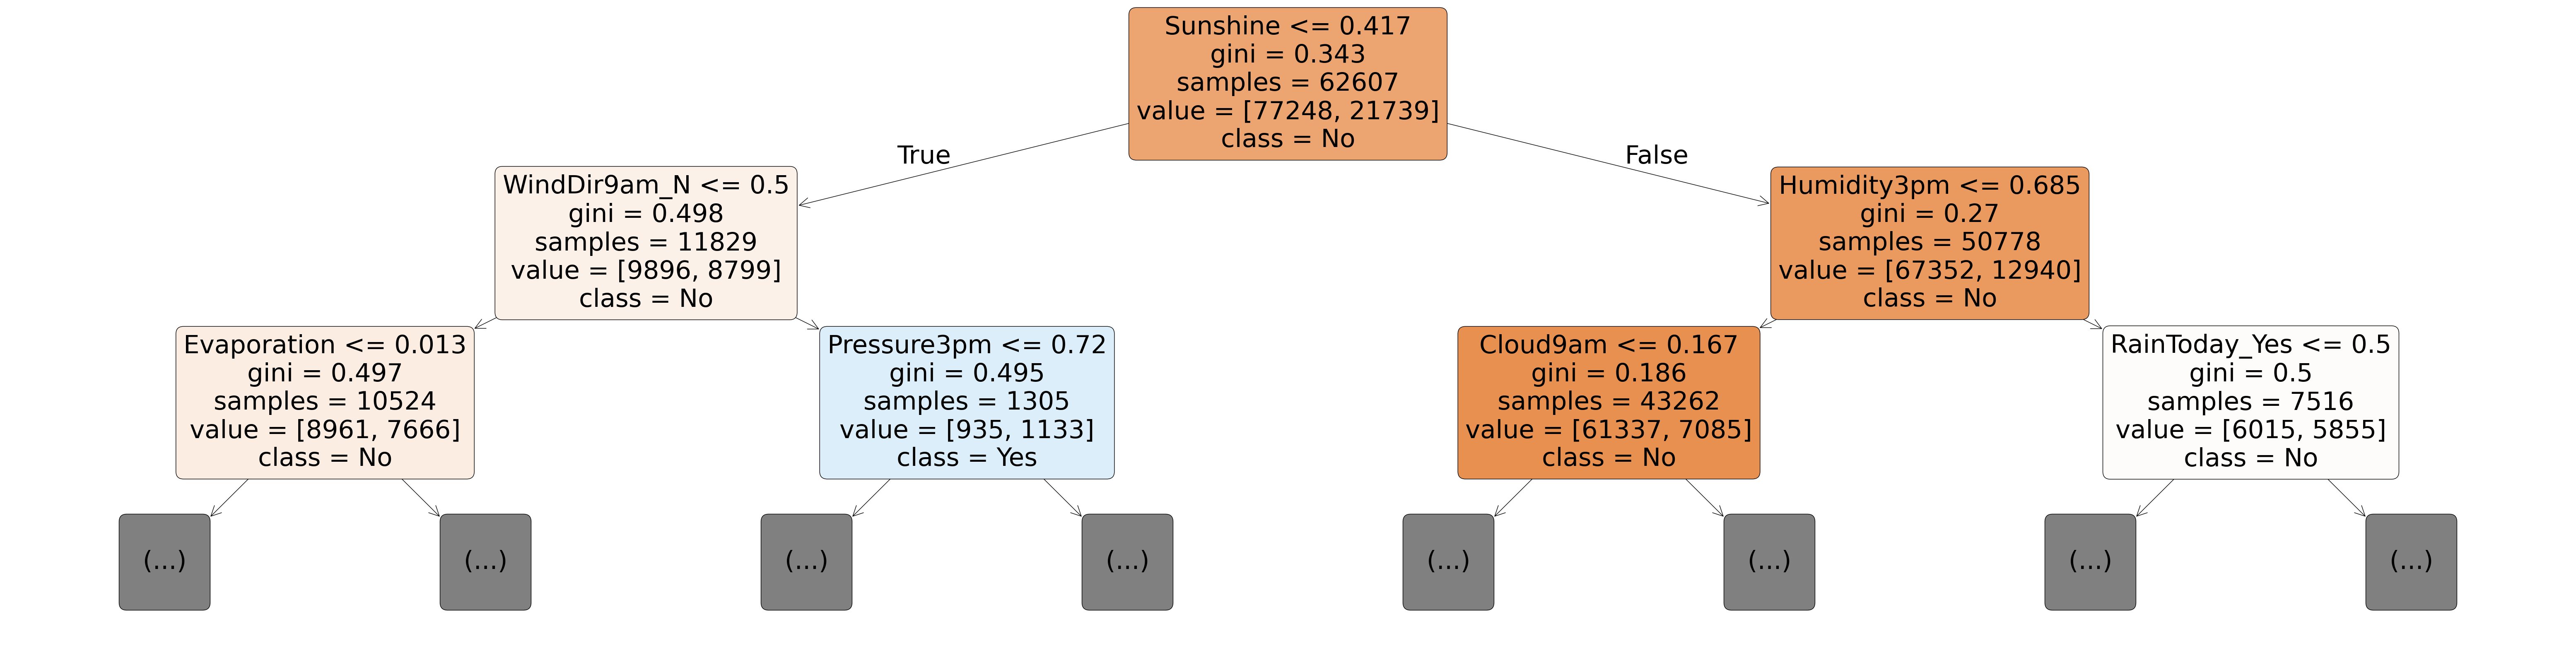

In [64]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

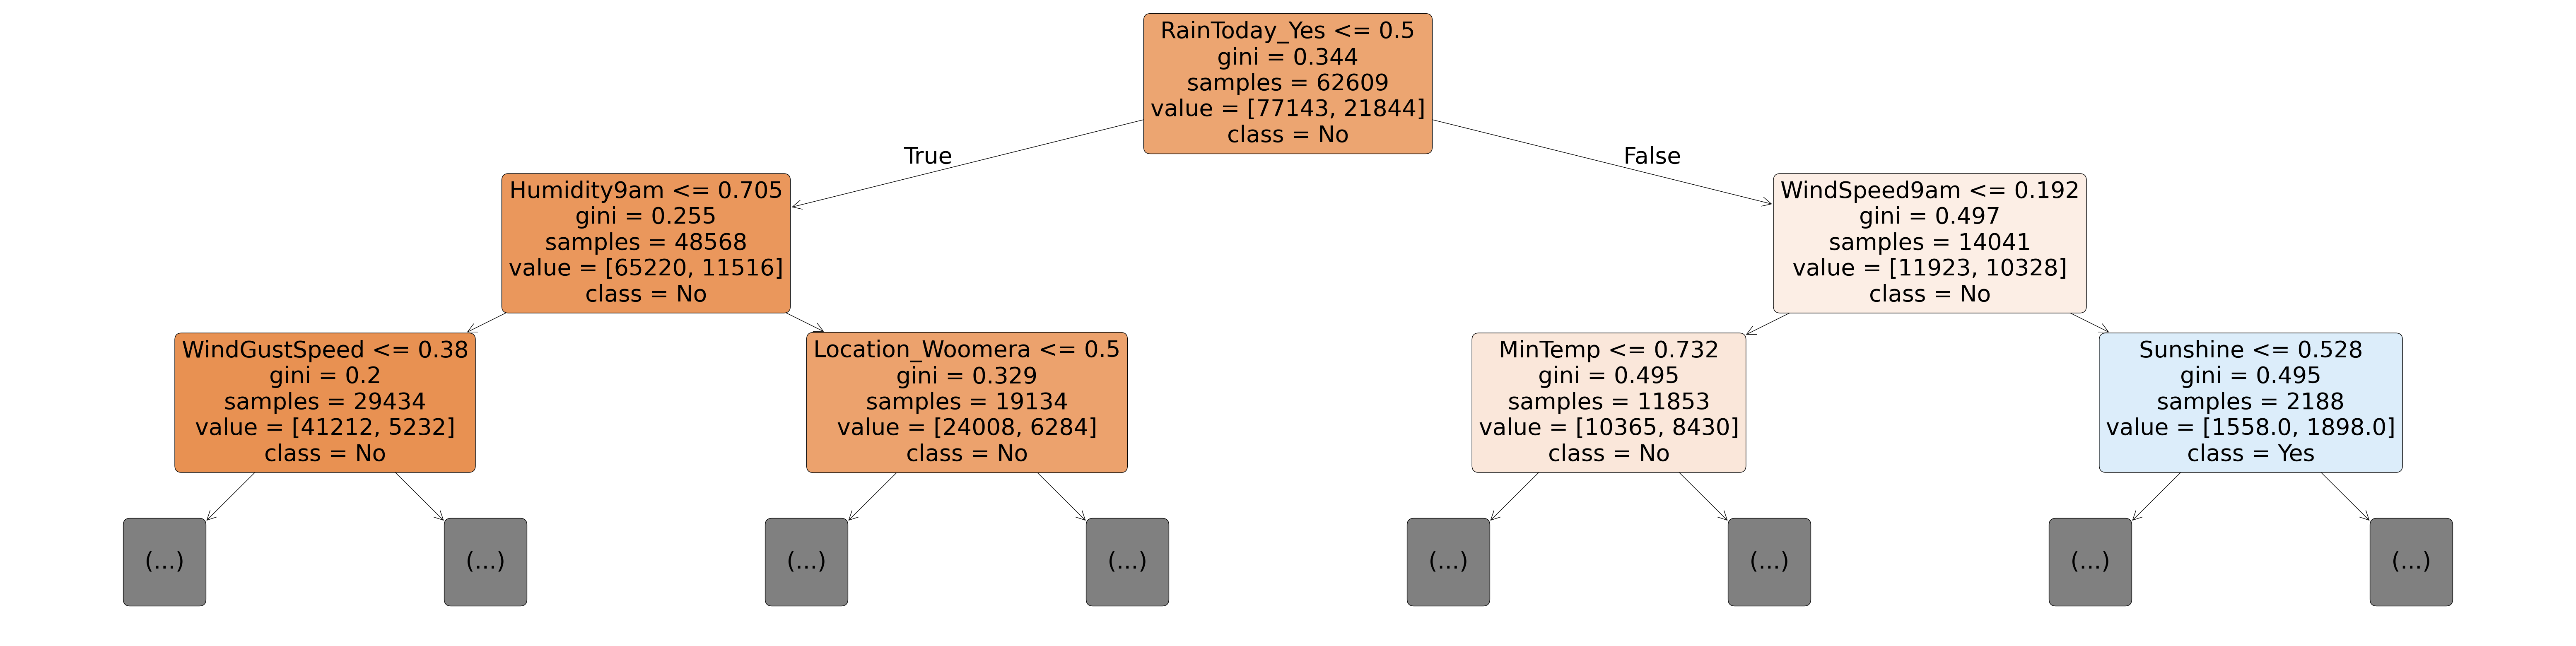

In [65]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [66]:
len(model.estimators_)

100

In [67]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [68]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.133362
4,Sunshine,0.055265
11,Pressure3pm,0.053221
10,Pressure9am,0.050055
8,Humidity9am,0.048255
2,Rainfall,0.048109
5,WindGustSpeed,0.047768
15,Temp3pm,0.046283
1,MaxTemp,0.043266
0,MinTemp,0.042631


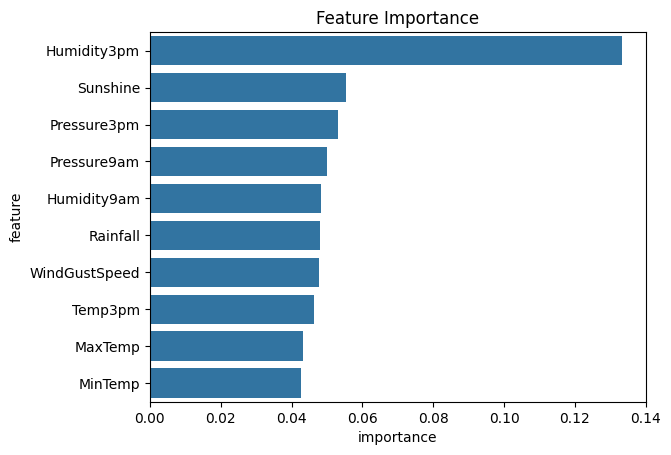

In [69]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [70]:
#?RandomForestClassifier

In [71]:
base_model = RandomForestClassifier(random_state = 42 , n_jobs = -1).fit(X_train , train_targets)

In [72]:
base_train_acc = base_model.score(X_train , train_targets)

In [73]:
base_val_acc = base_model.score(X_val , val_targets)

In [74]:
base_accs = [base_train_acc , base_val_acc]
(base_accs)

[0.9999696929899886, 0.849233983286908]

In [75]:
model = RandomForestClassifier(n_jobs = -1 , random_state = 42 , n_estimators = 20)

In [76]:
%%time
model.fit(X_train , train_targets)

CPU times: total: 11.3 s
Wall time: 2.04 s


RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)

In [77]:
model.score(X_train , train_targets) , model.score(X_val , val_targets)

(0.9961207027185388, 0.8429085422469823)

In [78]:
base_accs

[0.9999696929899886, 0.849233983286908]

In [79]:
def test_params(**params) :
    model = RandomForestClassifier(random_state = 42 , n_jobs = -1 , **params).fit(X_train , train_targets)
    return model.score(X_train , train_targets) , model.score(X_val , val_targets)

In [80]:
%%time
test_params(max_depth = 25, max_leaf_nodes = 2**20 , n_estimators = 100)

CPU times: total: 1min 24s
Wall time: 16.2 s


(0.9785426369119177, 0.849872330547818)

In [81]:
base_accs

[0.9999696929899886, 0.849233983286908]

In [82]:
test_params(max_features='log2')

(0.999979795326659, 0.8484795728876509)

In [83]:
test_params(max_features = 10)

(0.9999696929899886, 0.849233983286908)

In [84]:
test_params(max_features = 20)

(0.9999595906533181, 0.8514972144846796)

In [85]:
test_params(min_samples_split = 100 , min_samples_leaf = 50)

(0.8535969369715215, 0.8401810584958217)

In [86]:
test_params(max_features = 100 , min_samples_split = 5 , min_samples_leaf = 5 , max_depth = 25)

(0.9380524715366664, 0.849872330547818)

In [87]:
test_params(min_impurity_decrease = 1e-5)

(0.9189792599028155, 0.8471448467966574)

In [88]:
test_params(max_features = 50 , min_samples_split = 5 , min_samples_leaf = 5 , max_depth = 25 , min_impurity_decrease = 1e-5)

(0.9242829866548132, 0.8485376044568245)

In [89]:
base_accs

[0.9999696929899886, 0.849233983286908]

In [90]:
test_params(bootstrap = False)

(0.999979795326659, 0.8508588672237697)

In [91]:
test_params(max_samples = 0.9)

(0.999808055603261, 0.8496982358402971)

In [92]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [93]:
test_params(class_weight='balanced')

(0.9999595906533181, 0.8484795728876509)

In [94]:
test_params(class_weight={'No': 3, 'Yes': 10})

(0.9999595906533181, 0.8485376044568245)

In [95]:
model = RandomForestClassifier(n_jobs = -1 , 
                               random_state = 42, 
                               n_estimators = 50 , 
                               max_samples = 50 , 
                               max_depth = 50 , 
                               max_features = 15 , 
                               class_weight = {'No' : 2 , 'Yes' : 5}
                              )
model.fit(X_train , train_targets)
model.score(X_train , train_targets) , model.score(X_val , val_targets)

(0.8150767272470122, 0.8123259052924791)

In [96]:
test_params(                   n_estimators = 500 , 
                               min_samples_leaf = 5 , 
                               max_depth = 30 , 
                               max_features = 20 , 
                               class_weight = {'No' : 1 , 'Yes' : 1.5})

(0.9323951630012022, 0.8512650882079852)

In [97]:
def test_params_test(**params) :
    model = RandomForestClassifier(random_state = 42 , n_jobs = -1 , **params).fit(X_test , test_targets)
    return model.score(X_test , test_targets)

In [99]:
mode_value = train_targets.mode()[0]
print(f"Mode of train_targets: {mode_value}")

# Fill missing values in train_targets with the mode
test_targets.fillna(mode_value, inplace=True)

# Verify if there are still any NaN values
print(test_targets.isna().sum())

Mode of train_targets: No
0
